In [52]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [53]:
y = np.array([-0.39, 0.12, 0.94, 1.67, 1.76, 2.44, 3.72, 4.28, 4.92, 5.53, 0.06, 0.48, 1.01, 1.68, 1.80, 3.25, 4.12, 4.60, 5.28, 6.22])

In [54]:
var1, var2 = np.var(y), np.var(y)
mu1, mu2 = y[np.random.randint(y.shape[0])], y[np.random.randint(y.shape[0])]
pi = 0.5

In [55]:
gamma = np.zeros(shape=(y.shape[0]))

In [56]:
for k in range(100):
    for i in range(y.shape[0]):
        gamma[i] = pi*norm.pdf(y[i], mu2, var2**0.5)/((1-pi)*norm.pdf(y[i], mu1, var1**0.5) + pi*norm.pdf(y[i], mu2, var2**0.5))
    mu1, var1 = np.sum((1-gamma)*y)/np.sum(1-gamma), np.sum((1-gamma)*((y-mu1)**2))/np.sum(1-gamma)
    mu2, var2 = np.sum(gamma*y)/np.sum(gamma), np.sum(gamma*((y-mu2)**2))/np.sum(gamma)
    pi = np.mean(gamma)
print(mu1, var1, mu2, var2, pi)

1.0831618077374836 0.8113706189149964 4.655912807977064 0.8187935704405764 0.44540976747492483


(array([0.1, 0.3, 0.1, 0.1, 0.4, 0.1, 0. , 0.1, 0.1, 0.2, 0.2, 0.1, 0.1,
        0.1]),
 array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,
         5. ,  5.5,  6. ,  6.5]),
 <a list of 14 Patch objects>)

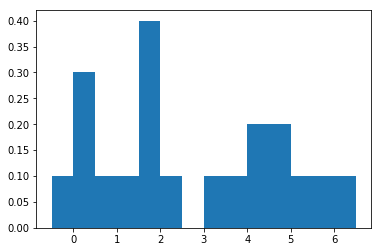

In [57]:
plt.hist(y, np.linspace(-0.5, 6.5, 15), density=True)

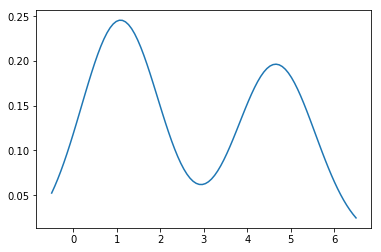

In [58]:
x = np.linspace(-0.5, 6.5, 100)
y = (1-pi)*norm.pdf(x, mu1, var1**0.5) + pi*norm.pdf(x, mu2, var2**0.5)
plt.plot(x, y)